In [1]:
import pandas as pd
import opendatasets as od
from tensorflow.keras.callbacks import EarlyStopping
import numpy as np
import matplotlib.pylab as plt
from sklearn.model_selection import train_test_split
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras import layers, models, optimizers
from tensorflow.keras import backend as K
!pip3 install keras-tuner --upgrade

Requirement already up-to-date: keras-tuner in /home/apprenant/PycharmProjects/ClimateProject---E3/env/lib/python3.8/site-packages (1.1.2)


In [2]:
od.download("https://www.kaggle.com/saurabhbagchi/ship-and-iceberg-images")

Skipping, found downloaded files in "./ship-and-iceberg-images" (use force=True to force download)


In [3]:
import os
for dirname, _, filenames in os.walk('/home/apprenant/PycharmProjects/ClimateProject---E3/ship-and-iceberg-images/input_data.npz'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

 # Load the data

In [4]:
npz = np.load('/home/apprenant/PycharmProjects/ClimateProject---E3/Data analysis/ship-and-iceberg-images/input_data.npz')

x = npz['X_train']
y = npz['Y_train']
del npz

In [5]:
print('shape of picture: {}'.format(x.shape))
print('shape of picture: {}'.format(y.shape))

shape of picture: (4113, 75, 75, 3)
shape of picture: (4113,)


In [6]:
# First split the data in two sets, 80% for training, 20% for Val/Test)
X_train, X_valtest, y_train, y_valtest = train_test_split(x,y, test_size=0.2, random_state=1, stratify=y)

# Second split the 20% into validation and test sets
X_test, X_val, y_test, y_val = train_test_split(X_valtest, y_valtest, test_size=0.8, random_state=1, stratify=y_valtest)

In [7]:
print(np.array(X_train).shape)
print(np.array(X_val).shape)
print(np.array(X_test).shape)
print(np.array(y_train).shape)
print(np.array(y_val).shape)
print(np.array(y_test).shape)

(3290, 75, 75, 3)
(659, 75, 75, 3)
(164, 75, 75, 3)
(3290,)
(659,)
(164,)


In [8]:
K.image_data_format()

'channels_last'

In [9]:
img_width, img_height = 75, 75
nb_train_samples = len(X_train)
nb_validation_samples = len(X_val)
epochs = 10
batch_size = 16

In [10]:
model = models.Sequential()

model.add(layers.Conv2D(32, (3, 3), input_shape=(img_width, img_height, 3)))
model.add(layers.BatchNormalization())
model.add(layers.Activation("relu"))

model.add(layers.MaxPooling2D((2, 2)))

model.add(layers.Conv2D(64, (3, 3)))
model.add(layers.BatchNormalization())
model.add(layers.Activation("relu"))

model.add(layers.MaxPooling2D((2, 2)))

model.add(layers.Conv2D(128, (3, 3)))
model.add(layers.BatchNormalization())
model.add(layers.Activation("relu"))

model.add(layers.MaxPooling2D((2, 2)))

model.add(layers.Flatten())
model.add(layers.Dense(64))
model.add(layers.BatchNormalization())
model.add(layers.Activation("relu"))

model.add(layers.Dense(1))
model.add(layers.BatchNormalization())
model.add(layers.Activation("sigmoid"))

model.compile(
    loss='binary_crossentropy',
    optimizer=optimizers.Adam(lr=0.001, beta_1=0.9, beta_2=0.999, epsilon=1e-7, decay=0.0),
    metrics=['accuracy']);

/home/apprenant/.local/lib/python3.8/site-packages/tensorflow/python/keras/optimizer_v2/optimizer_v2.py:374: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  warnings.warn(


DATA AUGMENTATION

In [11]:
train_datagen = ImageDataGenerator(rescale=1. / 255, horizontal_flip=True, rotation_range=30)
valtest_datagen = ImageDataGenerator(rescale=1. / 255)

In [12]:
train_generator = train_datagen.flow(np.array(X_train), y_train, batch_size=batch_size)
validation_generator = valtest_datagen.flow(np.array(X_val), y_val, batch_size=batch_size)
test_generator = valtest_datagen.flow(np.array(X_test), y_test, batch_size=batch_size)

In [13]:
# Create early stopping (once our model stops improving, stop training)
early_stopping = EarlyStopping(monitor="val_accuracy", patience=6) # stops after 6 rounds of no improvements

In [14]:
history = model.fit_generator(
    train_generator, 
    steps_per_epoch=nb_train_samples // batch_size,
    epochs=epochs,
    callbacks=early_stopping,
    validation_data=validation_generator,
    validation_steps=nb_validation_samples // batch_size
);

#model.save_weights('weights.h5')

/home/apprenant/.local/lib/python3.8/site-packages/tensorflow/python/keras/engine/training.py:1940: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  warnings.warn('`Model.fit_generator` is deprecated and '


Epoch 1/10
205/205 [==============================] - 15s 67ms/step - loss: 0.4791 - accuracy: 0.7975 - val_loss: 0.7285 - val_accuracy: 0.4848
Epoch 2/10
205/205 [==============================] - 13s 65ms/step - loss: 0.4119 - accuracy: 0.8519 - val_loss: 0.7081 - val_accuracy: 0.5137
Epoch 3/10
205/205 [==============================] - 14s 67ms/step - loss: 0.3812 - accuracy: 0.8586 - val_loss: 3.9824 - val_accuracy: 0.4863
Epoch 4/10
205/205 [==============================] - 13s 62ms/step - loss: 0.3591 - accuracy: 0.8732 - val_loss: 12.4875 - val_accuracy: 0.4863
Epoch 5/10
205/205 [==============================] - 13s 61ms/step - loss: 0.3280 - accuracy: 0.8861 - val_loss: 0.7284 - val_accuracy: 0.5183
Epoch 6/10
205/205 [==============================] - 13s 61ms/step - loss: 0.3133 - accuracy: 0.8842 - val_loss: 13.7217 - val_accuracy: 0.4848
Epoch 7/10
205/205 [==============================] - 13s 62ms/step - loss: 0.2966 - accuracy: 0.9026 - val_loss: 28.0396 - val_accura

# RUN CNN

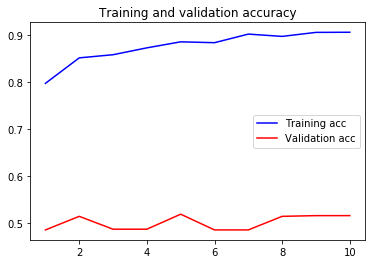

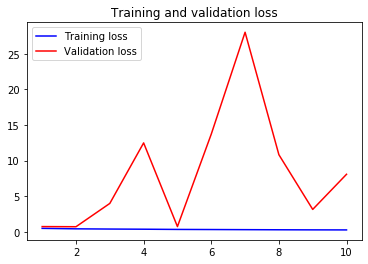

In [17]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']
epochs = range(1, len(acc) + 1)
plt.plot(epochs, acc, 'blue', label='Training acc')
plt.plot(epochs, val_acc, 'red', label='Validation acc')
plt.title('Training and validation accuracy')
plt.legend()
plt.figure()
plt.plot(epochs, loss, 'blue', label='Training loss')
plt.plot(epochs, val_loss, 'red', label='Validation loss')
plt.title('Training and validation loss')
plt.legend()
plt.show()

# ÉVALUATION

In [18]:


#create a dataframe of the model training history
results = pd.DataFrame(history.history)
results.head()



,loss,accuracy,val_loss,val_accuracy
0,0.479069,0.797495,0.728496,0.484756
1,0.411938,0.851863,0.708149,0.513719
2,0.381200,0.858583,3.982449,0.486281
3,0.359058,0.873244,12.487513,0.486281
4,0.327955,0.886072,0.728394,0.518293


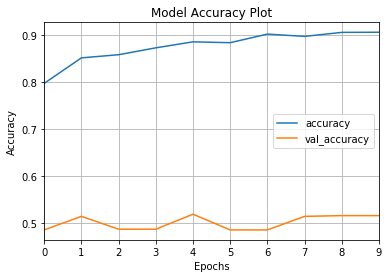

In [19]:
#plot the accuracy over the training and test set
results[['accuracy','val_accuracy']].plot()
plt.title('Model Accuracy Plot')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.grid()
plt.show()

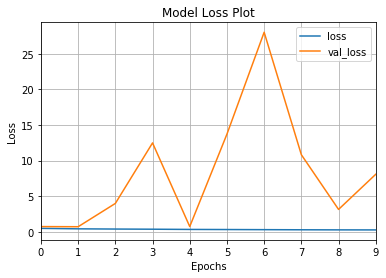

In [20]:
#plot the loss over the training and test set
results[['loss','val_loss']].plot()
plt.title('Model Loss Plot')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.grid()
plt.show()

/home/apprenant/.local/lib/python3.8/site-packages/tensorflow/python/keras/engine/sequential.py:455: UserWarning: `model.predict_classes()` is deprecated and will be removed after 2021-01-01. Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).
  warnings.warn('`model.predict_classes()` is deprecated and '


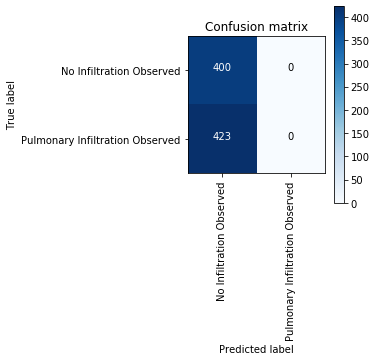

In [21]:


# Thanks to paultimothymooney for the code to generate this!

import sklearn
import itertools
from sklearn.metrics import confusion_matrix
dict_characters = {0: 'No Infiltration Observed', 1: 'Pulmonary Infiltration Observed'}
def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    plt.figure(figsize = (5,5))
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=90)
    plt.yticks(tick_marks, classes)
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, cm[i, j],
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")
    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')
a=X_train
b=y_train
c=X_valtest
d=y_valtest
Y_pred = model.predict_classes(c)
Y_pred_classes = np.argmax(Y_pred,axis=1) 
confusion_mtx = confusion_matrix(d, Y_pred_classes) 
plot_confusion_matrix(confusion_mtx, classes = list(dict_characters.values()))